In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import data
import utils
from main import extract_summary, report_rouge_scores

%load_ext autoreload
%autoreload 2

### Cornell Newsroom Summarization Dataset

Data are donwloaded from the [cornell newsroom summarization dataset](https://summari.es/). We are using the development set. We select *extractive* for our task and only include data that has 5 or more sentences in the summary.

In [1]:
# Convert newsroom jason file (dev.jsonl) to csv file (uncomment and run the code if 'news_dev.csv' is not available)
#data.newsroom_json2csv()

In [2]:
# news = pd.read_csv('../data/newsroom/news_dev.csv')
# print('# of articles:', len(news))
# news.head()

### Summarization

- Summarization algorithms includes: 
    - SMRS (TF-IDF matrix)
    - Franke-Wolfe (TF-IDF matrix)
    - Franke-Wolfe (Sentence embeddings matrix)
- *Matlab* and *Python for matlab engine* is required to run the SMRS method. Remove `'SMRS'` from the `methods` list below if matlab is not installed.

- Main function: `extract_summary()`

```python
# Arguments:
#     - doc: string; article body text
#     - ref: string; reference summary
#     - title: string; title of the article
#     - k: number of extracted examplars
#     - print_summary: print summary text for each algorithm
#     - report_rouge: report rouge score (need to pass in ref argument)
#     - rouge_embed: use word embedding to calculate rouge score
#     - vectorize_scores: return scores in np.ndarray instead of in a dictionary
#     - methods: summarization algorithms to be used
# Return:
#     - summary: dictionary; extracted summary sentences using each algorithm
#     - word_count: dictionary; number of words in the extracted summary
#     - runtime: computation time of each algorithm
#     - scores: rouge score of each algorithm
        
summary, word_count, runtime, scores = extract_summary(doc, ref=None, title=None, k=5, print_summary=False, 
                                                       report_rouge=False, print_rouge=True, rouge_embed=False, 
                                                       vectorize_scores=False, methods=['random', 'SMRS', 'tfidf', 'embed']);

```

In [2]:
# Get list of titles, reference summaries, and body text
news_titles, news_refs, news_text = data.get_newsroom_data()

In [30]:
# 9
doc_idx = 12
doc = news_text[doc_idx]
ref = news_refs[doc_idx]
title = news_titles[doc_idx]
print(ref)

A yearlong study by the Community Service Society of New York has concluded that the problem of homeless people on the streets of the city has ''reached such extraordinary proportions'' that emergency housing must be set up.   The study, to be made public tomorrow, says government agencies have failed to face the problem of the homeless and have made it even worse with the state's program of discharging many patients from mental institutions into communities.   The homeless are found in almost every part of the city. Sometimes they are seen shuffling along the streets or crouched in doorways seeking temporary shelter from wind and rain. They inhabit the bus and railroad stations and subways until they are chased away by the police.


In [19]:
# k=5
# ratio=0.2
methods = ['first-k', 'SMRS', 'TextRank', 'tfidf', 'embed']
extract_summary(doc, ref, title, report_rouge=False, methods=methods, print_summary=True);

Soruce Text: 32 sentences, 325 distinct vocab
# of selected sentences: 5

Title: HELP IS URGED FOR 36,000 HOMELESS IN CITY'S STREETS

=============== Referecne Text ==============
A yearlong study by the Community Service Society of New York has concluded that the problem of homeless people on the streets of the city has ''reached such extraordinary proportions'' that emergency housing must be set up.   The study, to be made public tomorrow, says government agencies have failed to face the problem of the homeless and have made it even worse with the state's program of discharging many patients from mental institutions into communities.   The homeless are found in almost every part of the city. Sometimes they are seen shuffling along the streets or crouched in doorways seeking temporary shelter from wind and rain. They inhabit the bus and railroad stations and subways until they are chased away by the police.
-----
Word count:122
[3.434647  3.6523156 3.8631735 3.585481  3.945796 ]
Simil

### ROUGE Score

In [23]:
%%time
# k=5
# ratio=0.3
methods = ['first-k', 'SMRS', 'TextRank', 'tfidf', 'embed']
extract_summary(doc, ref, title, report_rouge=True, rouge_embed=False, 
                methods=methods, print_summary=True, print_rouge=True);

Soruce Text: 5 sentences, 58 distinct vocab
# of selected sentences: 4

Title: Activate London 2011: David Edelstein

=============== Referecne Text ==============
David is director of the Grameen Foundation Technology Centre and vice president of technology programmes at Grameen Foundation (GF). As the leader of GF's work in technology, he guides programmes that create innovative and sustainable approaches to employing technology for the benefit of the world's poor. This includes efforts to develop services that can be widely accessed on mobile phones, in domains such as health and agriculture, to improve lives and livelihoods. It also encompasses efforts in technology for microfinance, enabling the poor to transfer funds using mobile
-----
Word count:88
[3.3486698 3.5584235 3.6969194 3.6444042]
Similarity score: 50.824863

========== Extracted summary: First k ==========
David is director of the grameen foundation technology centre and vice president of technology programmes at grame

### Word Embedding ROUGE Score

In [82]:
%%time
_ = extract_summary(doc, ref, title, report_rouge=True, rouge_embed=True, 
                    methods=methods, print_summary=False, print_rouge=True);


=============== ROUGE Scores ===============

SMRS
Overlap 1-gram 			F1: 0.519
Overlap 1-gram 			Precision: 0.521
Overlap 1-gram 			Recall: 0.517
Overlap bi-gram 		F1: 0.591
Overlap bi-gram 		Precision: 0.602
Overlap bi-gram 		Recall: 0.579
Longest Common Subsequence 	F1: 0.517
Longest Common Subsequence 	Precision: 0.517
Longest Common Subsequence 	Recall: 0.517

TextRank
Overlap 1-gram 			F1: 0.541
Overlap 1-gram 			Precision: 0.520
Overlap 1-gram 			Recall: 0.564
Overlap bi-gram 		F1: 0.632
Overlap bi-gram 		Precision: 0.612
Overlap bi-gram 		Recall: 0.654
Longest Common Subsequence 	F1: 0.449
Longest Common Subsequence 	Precision: 0.406
Longest Common Subsequence 	Recall: 0.564

tfidf
Overlap 1-gram 			F1: 0.582
Overlap 1-gram 			Precision: 0.549
Overlap 1-gram 			Recall: 0.620
Overlap bi-gram 		F1: 0.664
Overlap bi-gram 		Precision: 0.622
Overlap bi-gram 		Recall: 0.713
Longest Common Subsequence 	F1: 0.451
Longest Common Subsequence 	Precision: 0.404
Longest Common Subsequence 	

### ROUGE Score Across Documents

In [4]:
#k = 5
start = 0
num_articles = 50
articles = news_text[start : start + num_articles]
references = news_refs[start : start + num_articles]
titles = news_titles[start : start + num_articles]

In [7]:
%%time
# greedy
methods = ['SMRS', 'TextRank', 'tfidf', 'embed']
rouge_mean, rouge_median, rouge_std = report_rouge_scores(articles, references, titles, methods=methods)

index =  ['1-gram F1', '1-gram Precision', '1-gram Recall', 'bi-gram F1', 'bi-gram Precision', 'bi-gram Recall', 
          'longest common F1', 'longest common Precision', 'longest common Recall', 'runtime', 'word count']

print('=' * 22 + ' Mean ' + '=' * 22)
rouge_mean.index = index
display(rouge_mean)

print('=' * 21 + ' Median ' + '=' * 21)
rouge_median.index = index
display(rouge_median)

print('=' * 15 + ' Standard Deviation ' + '=' * 15)
rouge_std.index = index
display(rouge_std)

====================== Mean ======================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.174268,0.321536,0.294396,0.191454
1-gram Precision,0.195976,0.299385,0.243969,0.230953
1-gram Recall,0.169251,0.371813,0.393332,0.176924
bi-gram F1,0.080787,0.219944,0.178606,0.085134
bi-gram Precision,0.086134,0.205838,0.149954,0.096313
bi-gram Recall,0.080524,0.253760,0.233954,0.083893
longest common F1,0.152945,0.291558,0.253601,0.167643
longest common Precision,0.182178,0.288326,0.232842,0.219108
longest common Recall,0.157545,0.355266,0.371028,0.168559
runtime,0.396349,0.006503,0.000689,0.001106


===================== Median =====================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.122797,0.262500,0.214230,0.148359
1-gram Precision,0.164042,0.215951,0.165365,0.201852
1-gram Recall,0.126667,0.372989,0.320057,0.118292
bi-gram F1,0.000000,0.139654,0.086334,0.000000
bi-gram Precision,0.000000,0.098863,0.059614,0.000000
bi-gram Recall,0.000000,0.238192,0.132104,0.000000
longest common F1,0.106433,0.199327,0.163280,0.117387
longest common Precision,0.144958,0.185737,0.147241,0.180653
longest common Recall,0.104575,0.348097,0.313908,0.106763
runtime,0.406024,0.005479,0.000424,0.000967


=============== Standard Deviation ===============


,SMRS,TextRank,tfidf,embed
1-gram F1,0.167842,0.246057,0.196166,0.183714
1-gram Precision,0.169518,0.258678,0.182472,0.187278
1-gram Recall,0.176304,0.246633,0.215148,0.196555
bi-gram F1,0.147922,0.245032,0.206899,0.172210
bi-gram Precision,0.156051,0.252024,0.183957,0.176559
bi-gram Recall,0.150817,0.252878,0.250044,0.181604
longest common F1,0.166012,0.251423,0.201558,0.181289
longest common Precision,0.168430,0.263142,0.187409,0.187267
longest common Recall,0.175113,0.253517,0.226465,0.197340
runtime,0.072477,0.003885,0.001138,0.000811


CPU times: user 5min 59s, sys: 25.2 s, total: 6min 24s
Wall time: 8min 59s


In [13]:
%%time
# SIF
methods = ['SMRS', 'TextRank', 'tfidf', 'embed']
rouge_mean, rouge_median, rouge_std = report_rouge_scores(articles, references, titles, methods=methods)

index =  ['1-gram F1', '1-gram Precision', '1-gram Recall', 'bi-gram F1', 'bi-gram Precision', 'bi-gram Recall', 
          'longest common F1', 'longest common Precision', 'longest common Recall', 'runtime', 'word count']

print('=' * 22 + ' Mean ' + '=' * 22)
rouge_mean.index = index
display(rouge_mean)

print('=' * 21 + ' Median ' + '=' * 21)
rouge_median.index = index
display(rouge_median)

print('=' * 15 + ' Standard Deviation ' + '=' * 15)
rouge_std.index = index
display(rouge_std)

====================== Mean ======================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.174268,0.320681,0.285216,0.202546
1-gram Precision,0.195976,0.299748,0.241857,0.232378
1-gram Recall,0.169251,0.371072,0.372691,0.196266
bi-gram F1,0.080787,0.219944,0.169658,0.101466
bi-gram Precision,0.086134,0.205838,0.145797,0.107030
bi-gram Recall,0.080524,0.253760,0.217612,0.103759
longest common F1,0.152945,0.290701,0.247489,0.182655
longest common Precision,0.182178,0.288689,0.230501,0.224979
longest common Recall,0.157545,0.354526,0.353315,0.190394
runtime,0.417279,0.007007,0.742351,0.830506


===================== Median =====================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.122797,0.262500,0.206268,0.136080
1-gram Precision,0.164042,0.215951,0.163978,0.202041
1-gram Recall,0.126667,0.372989,0.317718,0.111111
bi-gram F1,0.000000,0.139654,0.071658,0.005747
bi-gram Precision,0.000000,0.098863,0.055728,0.010870
bi-gram Recall,0.000000,0.238192,0.107788,0.003759
longest common F1,0.106433,0.199327,0.166436,0.117279
longest common Precision,0.144958,0.194828,0.151864,0.184659
longest common Recall,0.104575,0.348097,0.311806,0.110101
runtime,0.430842,0.005363,0.722381,0.756639


=============== Standard Deviation ===============


,SMRS,TextRank,tfidf,embed
1-gram F1,0.167842,0.246880,0.195930,0.190105
1-gram Precision,0.169518,0.258525,0.189376,0.179655
1-gram Recall,0.176304,0.247580,0.209283,0.212551
bi-gram F1,0.147922,0.245032,0.204935,0.174619
bi-gram Precision,0.156051,0.252024,0.189933,0.166905
bi-gram Recall,0.150817,0.252878,0.237806,0.191177
longest common F1,0.166012,0.252211,0.201096,0.188423
longest common Precision,0.168430,0.263007,0.192178,0.179640
longest common Recall,0.175113,0.254390,0.216461,0.211942
runtime,0.094410,0.004978,0.356821,0.273549


CPU times: user 7min 39s, sys: 28.1 s, total: 8min 7s
Wall time: 10min 52s


### Word Embedding ROUGE Score Across Documents

In [5]:
%%time
methods = ['SMRS', 'TextRank', 'tfidf', 'embed']
rouge_mean_embed, rouge_median_embed, rouge_std_embed = report_rouge_scores(articles, references, titles, 
                                                                            rouge_embed=True, methods=methods)

print('=' * 22 + ' Mean ' + '=' * 22)
rouge_mean_embed.index = index
display(rouge_mean_embed)

print('=' * 21 + ' Median ' + '=' * 21)
rouge_median_embed.index = index
display(rouge_median_embed)

print('=' * 15 + ' Standard Deviation ' + '=' * 15)
rouge_std_embed.index = index
display(rouge_std_embed)

====================== Mean ======================


NameError: name 'index' is not defined

In [6]:
index =  ['1-gram F1', '1-gram Precision', '1-gram Recall', 'bi-gram F1', 'bi-gram Precision', 'bi-gram Recall', 
          'longest common F1', 'longest common Precision', 'longest common Recall', 'runtime', 'word count']

print('=' * 22 + ' Mean ' + '=' * 22)
rouge_mean_embed.index = index
display(rouge_mean_embed)

print('=' * 21 + ' Median ' + '=' * 21)
rouge_median_embed.index = index
display(rouge_median_embed)

print('=' * 15 + ' Standard Deviation ' + '=' * 15)
rouge_std_embed.index = index
display(rouge_std_embed)

====================== Mean ======================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.382815,0.456411,0.488869,0.405825
1-gram Precision,0.400693,0.439473,0.464585,0.414269
1-gram Recall,0.372561,0.477663,0.519065,0.402152
bi-gram F1,0.496086,0.573647,0.611283,0.525554
bi-gram Precision,0.516800,0.556393,0.578542,0.543372
bi-gram Recall,0.482149,0.597022,0.654095,0.513902
longest common F1,0.374811,0.376669,0.347039,0.402341
longest common Precision,0.665989,0.365266,0.322849,0.662258
longest common Recall,0.372561,0.477663,0.519065,0.402152
runtime,0.397775,0.006728,0.726068,0.813143


===================== Median =====================


,SMRS,TextRank,tfidf,embed
1-gram F1,0.346736,0.503241,0.476884,0.370331
1-gram Precision,0.387569,0.462180,0.442706,0.383289
1-gram Recall,0.355938,0.529986,0.510620,0.367755
bi-gram F1,0.476689,0.622987,0.590834,0.488286
bi-gram Precision,0.511166,0.582884,0.556060,0.512196
bi-gram Recall,0.464279,0.662088,0.651561,0.473005
longest common F1,0.347664,0.375994,0.298853,0.364101
longest common Precision,0.557466,0.351129,0.280124,0.650719
longest common Recall,0.355938,0.529986,0.510620,0.367755
runtime,0.415420,0.005656,0.701052,0.727467


=============== Standard Deviation ===============


,SMRS,TextRank,tfidf,embed
1-gram F1,0.114751,0.204129,0.121256,0.135504
1-gram Precision,0.108962,0.199191,0.116049,0.127071
1-gram Recall,0.126271,0.213692,0.131907,0.147079
bi-gram F1,0.121861,0.248342,0.129087,0.143156
bi-gram Precision,0.111361,0.245174,0.123068,0.134173
bi-gram Recall,0.138190,0.259466,0.146088,0.157922
longest common F1,0.121624,0.208178,0.158355,0.130738
longest common Precision,0.404048,0.218360,0.155380,0.313152
longest common Recall,0.126271,0.213692,0.131907,0.147079
runtime,0.082547,0.004788,0.353123,0.274487


### Runtime

In [60]:
%%time
k=5
num_articles = 100
methods = ['SMRS']
word_count_list, runtime_list = [], []
count = 1
for doc, ref, title in zip(news_text[:num_articles], news_refs[:num_articles], news_titles[:num_articles]):
    if count % 10 == 0: print('Processed %d documents' %count)
    _, word_count, runtime = extract_summary(doc, ref, title, k=k, report_rouge=False, methods=methods, print_summary=False);
    word_count_list.append(word_count)
    runtime_list.append(runtime)
    count += 1

Processed 10 documents
Processed 20 documents
Processed 30 documents
Processed 40 documents
Processed 50 documents
Processed 60 documents


MatlabExecutionError: 
  File /home/alicia/GitHub/extract-sum/SMRS_v1.0/rmRep.m, line 36, in rmRep

  File /home/alicia/GitHub/extract-sum/SMRS_v1.0/smrs.m, line 42, in smrs
Index in position 1 exceeds array bounds (must not exceed 1).


In [73]:
%%time
num_articles = 25
methods = ['SMRS']
count = 75
for doc, ref, title in zip(news_text[78:78+num_articles], news_refs[78:78+num_articles], news_titles[78:78+num_articles]):
    if count % 10 == 0: print('Processed %d documents' %count)
    _, word_count, runtime = extract_summary(doc, ref, title, k=k, report_rouge=False, methods=methods, print_summary=False);
    word_count_list.append(word_count)
    runtime_list.append(runtime)
    count += 1

Processed 80 documents
Processed 90 documents
CPU times: user 1.25 s, sys: 1.94 s, total: 3.2 s
Wall time: 1min 22s


In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

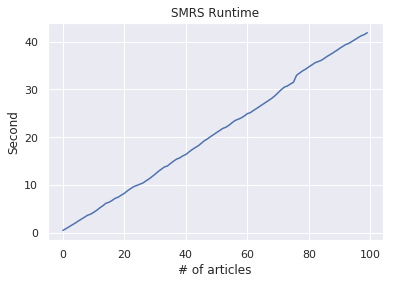

In [76]:
plt.plot(np.cumsum([runtime['SMRS'] for runtime in runtime_list]))
plt.title('SMRS Runtime')
plt.xlabel('# of articles')
plt.ylabel('Second');

In [ ]:
k = 5
start = 0
num_articles = 100
articles = news_text[start : start + num_articles]
references = news_refs[start : start + num_articles]
titles = news_titles[start : start + num_articles]

methods = ['SMRS', 'tfidf', 'embed']
rouge_mean, rouge_median, rouge_std = report_rouge_scores(articles, references, titles, k, methods=methods)

index =  ['1-gram F1', '1-gram Precision', '1-gram Recall', 'bi-gram F1', 'bi-gram Precision', 'bi-gram Recall', 
          'longest common F1', 'longest common Precision', 'longest common Recall', 'runtime', 'word count']

print('=' * 22 + ' Mean ' + '=' * 22)
rouge_mean.index = index
display(rouge_mean)

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [39]:
corpus = [s.split() for s in utils.clean_sentences(utils.split_sentence(doc))]

In [43]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [46]:
model.infer_vector(['yearlong','study'])

array([-0.00235193, -0.02436031, -0.05408425, -0.07937271, -0.09593163],
      dtype=float32)

In [45]:
import gensim
gensim.utils.simple_preprocess(doc)

['yearlong',
 'study',
 'by',
 'the',
 'community',
 'service',
 'society',
 'of',
 'new',
 'york',
 'has',
 'concluded',
 'that',
 'the',
 'problem',
 'of',
 'homeless',
 'people',
 'on',
 'the',
 'streets',
 'of',
 'the',
 'city',
 'has',
 'reached',
 'such',
 'extraordinary',
 'proportions',
 'that',
 'emergency',
 'housing',
 'must',
 'be',
 'set',
 'up',
 'the',
 'study',
 'to',
 'be',
 'made',
 'public',
 'tomorrow',
 'says',
 'government',
 'agencies',
 'have',
 'failed',
 'to',
 'face',
 'the',
 'problem',
 'of',
 'the',
 'homeless',
 'and',
 'have',
 'made',
 'it',
 'even',
 'worse',
 'with',
 'the',
 'state',
 'program',
 'of',
 'discharging',
 'many',
 'patients',
 'from',
 'mental',
 'institutions',
 'into',
 'communities',
 'the',
 'homeless',
 'are',
 'found',
 'in',
 'almost',
 'every',
 'part',
 'of',
 'the',
 'city',
 'sometimes',
 'they',
 'are',
 'seen',
 'shuffling',
 'along',
 'the',
 'streets',
 'or',
 'crouched',
 'in',
 'doorways',
 'seeking',
 'temporary',
 'sh